In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras


In [ ]:
#importing the contents from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List files in a directory
drive_path = '/content/drive/My Drive/'
files = os.listdir(drive_path)
print(files)



['payment proof.pdf', 'semister fee payment.pdf', '12 th program of c .gdoc', 'English(writing )-M.Sruthi-21110399.gdoc', 'Here are the instructions to be followed by you in appearing for board exam-.gdoc', 'Untitled document (3).gdoc', 'Untitled document (2).gdoc', 'snu yrc certificate.png', 'Compare and contrast_Worksheet 1 (1).docx.gdoc', 'Compare and contrast_Worksheet 1.docx.gdoc', '21110399- M.Sruthi.docx.gdoc', 'Survey questions (1).gdoc', 'Survey questions.gdoc', 'iot ', 'Abstract format .docx', 'Untitled document (1).gdoc', 'Untitled document.gdoc', '21011102058_DBMS_Ex3.pdf', 'Copy of 21011102058_DBMS_Ex3.pdf', 'Registration Form iCOMPUTER 2023.docm', 'Abstract submission payment.pdf', 'Receipt pay_LVMaIShjL0L1cQ from DevTown (Paid).pdf', 'Screenshot_2023-04-06-21-46-38-53_f541918c7893c52dbd1ee5d319333948.jpg', 'Document from Sruthi', 'profile.jpg', 'Google Keep Document.gdoc', 'Mangasamudram Sruthi_21011102058_Resume.pdf', 'Colab Notebooks', 'Mangasamudram_Sruthi-Resume.pdf'

In [ ]:
import os

# Specify the path to the directory in Google Drive
drive_path = '/content/drive/My Drive/'

# List files and folders in the directory
files = os.listdir(drive_path)

# Print each file/folder name on a new line
for file in files:
    print(file)


payment proof.pdf
semister fee payment.pdf
12 th program of c .gdoc
English(writing )-M.Sruthi-21110399.gdoc
Here are the instructions to be followed by you in appearing for board exam-.gdoc
Untitled document (3).gdoc
Untitled document (2).gdoc
snu yrc certificate.png
Compare and contrast_Worksheet 1 (1).docx.gdoc
Compare and contrast_Worksheet 1.docx.gdoc
21110399- M.Sruthi.docx.gdoc
Survey questions (1).gdoc
Survey questions.gdoc
iot 
Abstract format .docx
Untitled document (1).gdoc
Untitled document.gdoc
21011102058_DBMS_Ex3.pdf
Copy of 21011102058_DBMS_Ex3.pdf
Registration Form iCOMPUTER 2023.docm
Abstract submission payment.pdf
Receipt pay_LVMaIShjL0L1cQ from DevTown (Paid).pdf
Screenshot_2023-04-06-21-46-38-53_f541918c7893c52dbd1ee5d319333948.jpg
Document from Sruthi
profile.jpg
Google Keep Document.gdoc
Mangasamudram Sruthi_21011102058_Resume.pdf
Colab Notebooks
Mangasamudram_Sruthi-Resume.pdf
IMG_20240529_184344.jpg
IMG_20240529_184655.jpg
Screenshot_2024-02-27-15-34-06-89_45e6

In [ ]:
import pandas as pd

# Specify the path to your file
file_path = '/content/drive/My Drive/train.csv'

# Load the file into a DataFrame
train = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
file_path = '/content/drive/My Drive/test.csv'

# Load the file into a DataFrame
test = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# Check for missing values in the train dataset
train_missing = train.isnull().sum()

# Check for missing values in the test dataset
test_missing = test.isnull().sum()

print("Missing values in the train dataset:")
print(train_missing)

print("\nMissing values in the test dataset:")
print(test_missing)


Missing values in the train dataset:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values in the test dataset:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [ ]:
# Drop rows with missing values in the train dataset
train_df = train.dropna()

# Drop rows with missing values in the test dataset
test_df= test.dropna()


In [ ]:
# Check for missing values in the train dataset
train_missing = train_df.isnull().sum()

# Check for missing values in the test dataset
test_missing = test_df.isnull().sum()

print("Missing values in the train dataset:")
print(train_missing)

print("\nMissing values in the test dataset:")
print(test_missing)

Missing values in the train dataset:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Missing values in the test dataset:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [ ]:
import pandas as pd

# Check column names in train_df
print("Columns in train_df:", train_df.columns)

# Check column names in test_df
print("Columns in test_df:", test_df.columns)

# Assuming 'Loan_Status' is the correct column name, extract it from train_df
if 'Loan_Status' in train_df.columns:
    Loan_status = train_df['Loan_Status']
else:
    print("'Loan_Status' column not found in train_df")

# Drop the 'Loan_Status' column from train_df if it exists
if 'Loan_Status' in train_df.columns:
    train_df.drop('Loan_Status', axis=1, inplace=True)

# Extract 'Loan_ID' from test_df
if 'Loan_ID' in test_df.columns:
    Loan_ID = test_df['Loan_ID']
else:
    print("'Loan_ID' column not found in test_df")

# Combine the train_df and test_df datasets into one DataFrame called data
data = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Display the first few rows of the combined data
data.head()


Columns in train_df: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Columns in test_df: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


<ipython-input-75-2636a150932f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop('Loan_Status', axis=1, inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban


Columns in train_df after stripping: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Columns in test_df after stripping: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [ ]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
data.shape

(769, 12)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,769.000000,769.000000,769.000000,769.000000,769.000000
mean,5091.061118,1561.239168,141.750325,342.283485,0.849155
std,5363.714294,2528.694435,73.442988,65.337248,0.358131
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2895.000000,0.000000,100.000000,360.000000,1.000000
50%,3850.000000,1032.000000,128.000000,360.000000,1.000000
75%,5532.000000,2333.000000,163.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
data.Dependents.dtypes

dtype('O')

In [ ]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

,count
Gender,
1,624
0,145


In [ ]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

In [ ]:
data.Married.value_counts()

,count
Married,
1,498
0,271


In [ ]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [ ]:
data.Dependents.value_counts()

,count
Dependents,
0,441
2,135
1,122
3,71


In [ ]:
## Let's see correlations for it
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

ValueError: could not convert string to float: 'LP001003'

In [ ]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [ ]:
data.Education.value_counts()

,count
Education,
1,607
0,162


In [ ]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [ ]:
data.Self_Employed.value_counts()

,count
Self_Employed,
0,671
1,98


In [ ]:
data.Property_Area.value_counts()

,count
Property_Area,
Semiurban,278
Urban,263
Rural,228


In [ ]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [ ]:
data.Property_Area.value_counts()

,count
Property_Area,
1,278
2,263
0,228


In [ ]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

ValueError: could not convert string to float: 'LP001003'

In [ ]:
data.dtypes

,0
Loan_ID,object
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
data.Credit_History.size

769

In [ ]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
## Filling with median
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [ ]:
## Filling with mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [ ]:
data.Gender.value_counts()

,count
Gender,
1,624
0,145


In [ ]:
## Filling Gender with random number between 0-2
from random import randint
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [ ]:
## Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [ ]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [ ]:
## Dropping Loan ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

<Axes: >

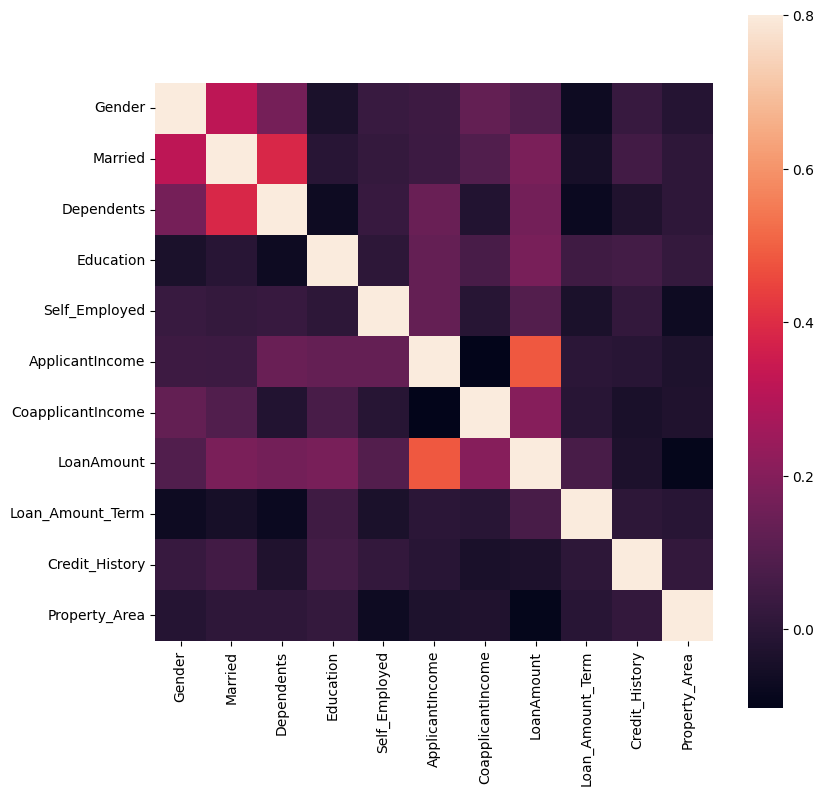

In [ ]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

<Axes: >

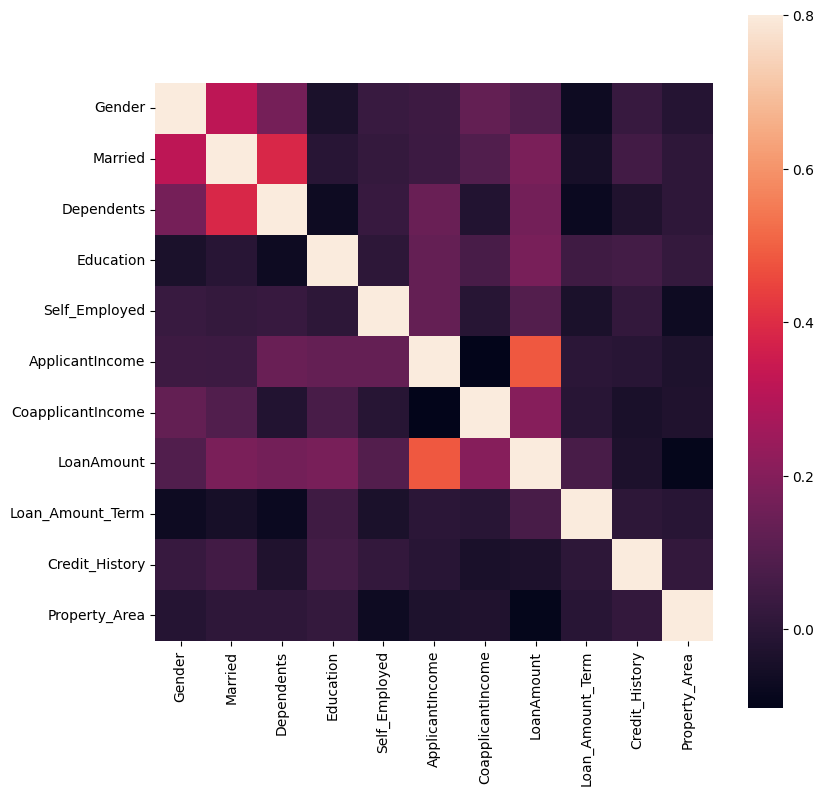

In [ ]:
## Let's see correlations for it
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [ ]:
data.Credit_History.size

769

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load datasets
train_df = pd.read_csv('/content/drive/My Drive/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/test.csv')

# Strip whitespace characters from column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Extract the target variable and drop it from the train set
X = train_df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = train_df['Loan_Status']

# Extract the Loan_ID from the test set
Loan_ID_test = test_df['Loan_ID']
X_test = test_df.drop(['Loan_ID'], axis=1)

# Convert categorical columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in test set to match train set
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X_test = imputer.transform(X_test)

# Encode the target variable (Loan_Status)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_split)

# Print classification report and accuracy score
print("Validation Classification Report:")
print(classification_report(y_val_split, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred))

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Convert numeric predictions back to original labels
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Loan_ID': Loan_ID_test,
    'Loan_Status': y_test_pred_labels
})

# Save the predictions to a CSV file
predictions_df.to_csv('/content/drive/My Drive/.csv', index=False)
loan_predictions

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

Validation Accuracy: 0.8373983739837398
